In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
# Read data from station "1"
station1_data = pd.read_csv('data/1/TA00098.csv')
station1_metadata = pd.read_csv('data/1/metadata.csv')

In [3]:
station1_data.head()

,timestamp (UTC),atmosphericpressure (kPa),precipitation (mm),radiation (W/m2),relativehumidity (-),temperature (degrees Celsius),winddirection (degrees),windgusts (m/s),windspeed (m/s)
0,2020-01-01 00:00,100.40,0.0,0.0,0.95,24.6,321.0,1.03,0.69
1,2020-01-01 00:05,100.40,0.0,0.0,0.95,24.6,319.0,0.71,0.56
2,2020-01-01 00:10,100.40,0.0,0.0,0.88,24.4,330.0,0.74,0.51
3,2020-01-01 00:15,100.39,0.0,0.0,0.97,24.1,349.0,0.46,0.38
4,2020-01-01 00:20,100.39,0.0,0.0,0.97,24.1,351.0,0.60,0.50


In [4]:
station1_data.tail()

,timestamp (UTC),atmosphericpressure (kPa),precipitation (mm),radiation (W/m2),relativehumidity (-),temperature (degrees Celsius),winddirection (degrees),windgusts (m/s),windspeed (m/s)
77265,2020-10-07 06:50,100.71,0.0,77.0,1.000,24.6,292.0,2.36,1.57
77266,2020-10-07 06:55,100.73,0.0,86.0,0.999,24.7,285.0,2.17,1.44
77267,2020-10-07 07:00,100.75,0.0,93.0,0.999,24.8,300.0,2.22,1.63
77268,2020-10-07 07:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77269,2020-10-07 07:25,100.81,0.0,57.0,0.919,25.0,300.0,3.17,2.09


In [5]:
station1_data.columns

Index(['timestamp (UTC)', 'atmosphericpressure (kPa)', 'precipitation (mm)',
       'radiation (W/m2)', 'relativehumidity (-)',
       'temperature (degrees Celsius)', 'winddirection (degrees)',
       'windgusts (m/s)', 'windspeed (m/s)'],
      dtype='object')

In [6]:
station1_data.rename(columns={'timestamp (UTC)': 'timestamp_(UTC)', 
                              'atmosphericpressure (kPa)': 'atmospheric_pressure_(kPa)', 
                              'precipitation (mm)': 'precipitation_(mm)',
                              'radiation (W/m2)': 'radiation_(W/m2)', 
                              'relativehumidity (-)': 'relative_humidity_(-)',
                              'temperature (degrees Celsius)': 'temperature_(degrees_Celsius)', 
                              'winddirection (degrees)': 'wind_direction_(degrees)',
                              'windgusts (m/s)': 'wind_gusts_(m/s)', 
                              'windspeed (m/s)': 'wind_speed_(m/s)'
                             }, inplace=True)

In [7]:
station1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77270 entries, 0 to 77269
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timestamp_(UTC)                77270 non-null  object 
 1   atmospheric_pressure_(kPa)     77190 non-null  float64
 2   precipitation_(mm)             77226 non-null  float64
 3   radiation_(W/m2)               77226 non-null  float64
 4   relative_humidity_(-)          76969 non-null  float64
 5   temperature_(degrees_Celsius)  77180 non-null  float64
 6   wind_direction_(degrees)       76034 non-null  float64
 7   wind_gusts_(m/s)               76034 non-null  float64
 8   wind_speed_(m/s)               76034 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.3+ MB


In [8]:
station1_data.duplicated().sum()

0

In [9]:
station1_data['timestamp_(UTC)'] = pd.to_datetime(station1_data['timestamp_(UTC)'])

In [10]:
station1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77270 entries, 0 to 77269
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   timestamp_(UTC)                77270 non-null  datetime64[ns]
 1   atmospheric_pressure_(kPa)     77190 non-null  float64       
 2   precipitation_(mm)             77226 non-null  float64       
 3   radiation_(W/m2)               77226 non-null  float64       
 4   relative_humidity_(-)          76969 non-null  float64       
 5   temperature_(degrees_Celsius)  77180 non-null  float64       
 6   wind_direction_(degrees)       76034 non-null  float64       
 7   wind_gusts_(m/s)               76034 non-null  float64       
 8   wind_speed_(m/s)               76034 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.3 MB


In [11]:
station1_data.describe()

,atmospheric_pressure_(kPa),precipitation_(mm),radiation_(W/m2),relative_humidity_(-),temperature_(degrees_Celsius),wind_direction_(degrees),wind_gusts_(m/s),wind_speed_(m/s)
count,77190.000000,77226.000000,77226.000000,76969.000000,77180.000000,76034.000000,76034.000000,76034.000000
mean,100.526015,0.006075,178.121734,0.856443,27.260851,259.117053,3.035310,1.546359
std,0.197612,0.121121,250.888642,0.127356,2.862613,57.985513,1.512501,0.700522
min,99.940000,0.000000,0.000000,0.160000,17.500000,0.000000,0.200000,0.110000
25%,100.390000,0.000000,0.000000,0.796000,24.900000,233.000000,1.880000,1.010000
50%,100.530000,0.000000,6.000000,0.890000,27.000000,257.000000,2.850000,1.440000
75%,100.660000,0.000000,324.000000,0.950000,29.000000,300.000000,4.020000,2.000000
max,101.210000,12.102000,1103.000000,1.000000,37.200000,359.000000,37.880000,12.430000


In [12]:
# Drop rows with any NA value to avoid us guessing values that might be wrong
station1_data.dropna(inplace=True)

In [13]:
station1_data.describe()

,atmospheric_pressure_(kPa),precipitation_(mm),radiation_(W/m2),relative_humidity_(-),temperature_(degrees_Celsius),wind_direction_(degrees),wind_gusts_(m/s),wind_speed_(m/s)
count,75782.000000,75782.000000,75782.000000,75782.000000,75782.000000,75782.000000,75782.000000,75782.000000
mean,100.523986,0.003054,180.712781,0.854327,27.325131,259.100631,3.035925,1.546503
std,0.197806,0.090860,252.021393,0.127138,2.842982,58.013495,1.512563,0.700025
min,99.940000,0.000000,0.000000,0.160000,17.500000,0.000000,0.200000,0.110000
25%,100.390000,0.000000,0.000000,0.794000,25.000000,233.000000,1.880000,1.010000
50%,100.530000,0.000000,8.000000,0.887000,27.000000,257.000000,2.850000,1.440000
75%,100.660000,0.000000,331.000000,0.948000,29.000000,300.000000,4.020000,2.000000
max,101.210000,12.102000,1103.000000,1.000000,37.200000,359.000000,37.880000,12.430000


In [14]:
station1_metadata

,station code,name,country,installation height (m),latitude,longitude,elevation (m),timezone
0,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra


In [15]:
station1_metadata.columns

Index(['station code', 'name', 'country', 'installation height (m)',
       'latitude', 'longitude', 'elevation (m)', 'timezone'],
      dtype='object')

In [16]:
station1_metadata.rename(columns={'station code': 'station_code', 
                                  'installation height (m)': 'installation_height_(m)',
                                  'elevation (m)': 'elevation_(m)'}, inplace=True)

In [17]:
station1_code = station1_metadata['station_code'].unique()[0]

In [18]:
station1_data['station_code'] = station1_code

In [19]:
station1_data.head()

,timestamp_(UTC),atmospheric_pressure_(kPa),precipitation_(mm),radiation_(W/m2),relative_humidity_(-),temperature_(degrees_Celsius),wind_direction_(degrees),wind_gusts_(m/s),wind_speed_(m/s),station_code
0,2020-01-01 00:00:00,100.40,0.0,0.0,0.95,24.6,321.0,1.03,0.69,TA00098
1,2020-01-01 00:05:00,100.40,0.0,0.0,0.95,24.6,319.0,0.71,0.56,TA00098
2,2020-01-01 00:10:00,100.40,0.0,0.0,0.88,24.4,330.0,0.74,0.51,TA00098
3,2020-01-01 00:15:00,100.39,0.0,0.0,0.97,24.1,349.0,0.46,0.38,TA00098
4,2020-01-01 00:20:00,100.39,0.0,0.0,0.97,24.1,351.0,0.60,0.50,TA00098


In [20]:
weather_df = station1_data.merge(station1_metadata, how='left', on='station_code')

In [21]:
weather_df.head()

,timestamp_(UTC),atmospheric_pressure_(kPa),precipitation_(mm),radiation_(W/m2),relative_humidity_(-),temperature_(degrees_Celsius),wind_direction_(degrees),wind_gusts_(m/s),wind_speed_(m/s),station_code,name,country,installation_height_(m),latitude,longitude,elevation_(m),timezone
0,2020-01-01 00:00:00,100.40,0.0,0.0,0.95,24.6,321.0,1.03,0.69,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra
1,2020-01-01 00:05:00,100.40,0.0,0.0,0.95,24.6,319.0,0.71,0.56,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra
2,2020-01-01 00:10:00,100.40,0.0,0.0,0.88,24.4,330.0,0.74,0.51,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra
3,2020-01-01 00:15:00,100.39,0.0,0.0,0.97,24.1,349.0,0.46,0.38,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra
4,2020-01-01 00:20:00,100.39,0.0,0.0,0.97,24.1,351.0,0.60,0.50,TA00098,GMet HQ,GH,2,5.651103,-0.164521,19,Africa/Accra


In [22]:
#weather_df.to_csv('data/clean/ghmet_hq1.csv', index=False)

In [23]:
weather_df['year'] = weather_df['timestamp_(UTC)'].dt.year.astype(str)
weather_df['month'] = weather_df['timestamp_(UTC)'].dt.month.astype('category')
weather_df['day'] = weather_df['timestamp_(UTC)'].dt.day.astype(str)
weather_df['hour'] = weather_df['timestamp_(UTC)'].dt.hour.astype(str)
weather_df['minute'] = weather_df['timestamp_(UTC)'].dt.minute.astype(str)

In [24]:
weather_df.head()

,timestamp_(UTC),atmospheric_pressure_(kPa),precipitation_(mm),radiation_(W/m2),relative_humidity_(-),temperature_(degrees_Celsius),wind_direction_(degrees),wind_gusts_(m/s),wind_speed_(m/s),station_code,...,installation_height_(m),latitude,longitude,elevation_(m),timezone,year,month,day,hour,minute
0,2020-01-01 00:00:00,100.40,0.0,0.0,0.95,24.6,321.0,1.03,0.69,TA00098,...,2,5.651103,-0.164521,19,Africa/Accra,2020,1,1,0,0
1,2020-01-01 00:05:00,100.40,0.0,0.0,0.95,24.6,319.0,0.71,0.56,TA00098,...,2,5.651103,-0.164521,19,Africa/Accra,2020,1,1,0,5
2,2020-01-01 00:10:00,100.40,0.0,0.0,0.88,24.4,330.0,0.74,0.51,TA00098,...,2,5.651103,-0.164521,19,Africa/Accra,2020,1,1,0,10
3,2020-01-01 00:15:00,100.39,0.0,0.0,0.97,24.1,349.0,0.46,0.38,TA00098,...,2,5.651103,-0.164521,19,Africa/Accra,2020,1,1,0,15
4,2020-01-01 00:20:00,100.39,0.0,0.0,0.97,24.1,351.0,0.60,0.50,TA00098,...,2,5.651103,-0.164521,19,Africa/Accra,2020,1,1,0,20


In [25]:
weather_df.columns

Index(['timestamp_(UTC)', 'atmospheric_pressure_(kPa)', 'precipitation_(mm)',
       'radiation_(W/m2)', 'relative_humidity_(-)',
       'temperature_(degrees_Celsius)', 'wind_direction_(degrees)',
       'wind_gusts_(m/s)', 'wind_speed_(m/s)', 'station_code', 'name',
       'country', 'installation_height_(m)', 'latitude', 'longitude',
       'elevation_(m)', 'timezone', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [26]:
weather_columns = ['atmospheric_pressure_(kPa)', 'precipitation_(mm)',
       'radiation_(W/m2)', 'relative_humidity_(-)',
       'temperature_(degrees_Celsius)', 'wind_direction_(degrees)',
       'wind_gusts_(m/s)', 'wind_speed_(m/s)']

# Exploratory Data Analysis (EDA)

### Using various methods to see patterns and analyse the data

Time series graphs of data to visualise any patterns in the data.

array([<AxesSubplot:title={'center':'atmospheric_pressure_(kPa)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'precipitation_(mm)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'radiation_(W/m2)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'relative_humidity_(-)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'temperature_(degrees_Celsius)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'wind_direction_(degrees)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'wind_gusts_(m/s)'}, xlabel='timestamp_(UTC)'>,
       <AxesSubplot:title={'center':'wind_speed_(m/s)'}, xlabel='timestamp_(UTC)'>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

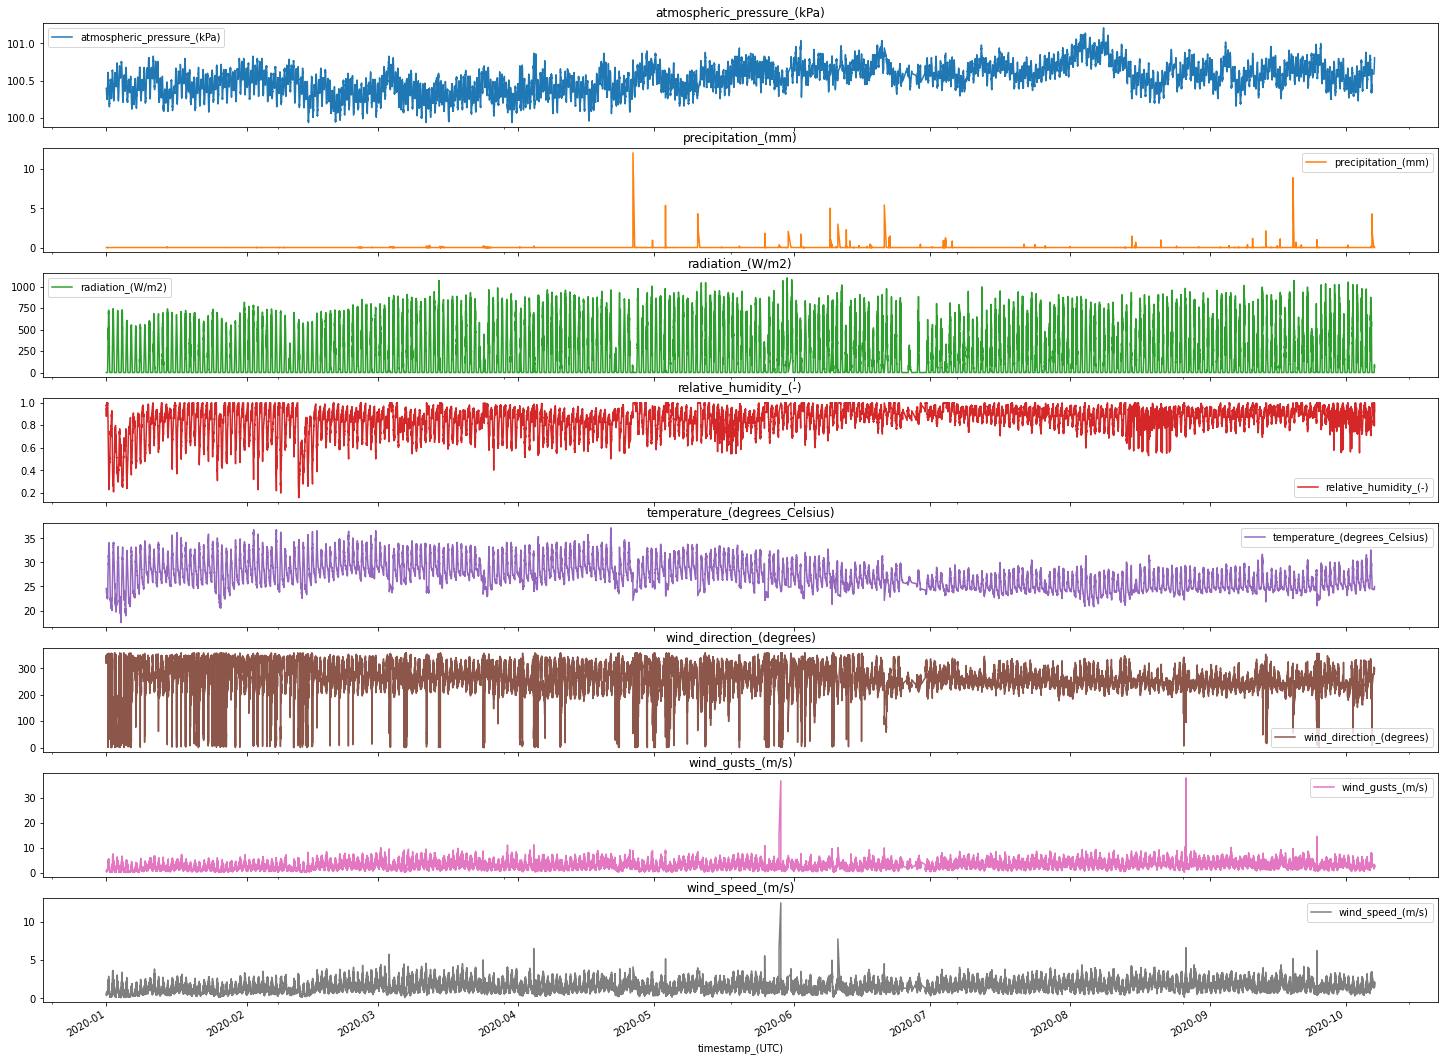

In [27]:
plt.figure()
weather_df.plot(x='timestamp_(UTC)', y=weather_columns, kind='line', figsize=(25, 20), subplots=True,
                title=weather_columns)

Autocorrelation plot to check the randomness of the data and determine whether there are patterns/correlations in the data.

https://otexts.com/fpp2/autocorrelation.html

https://www.geeksforgeeks.org/autocorrelation-plot-using-matplotlib/

https://www.investopedia.com/terms/a/autocorrelation.asp

Text(0.5, 1.0, 'atmospheric_pressure_(kPa)')

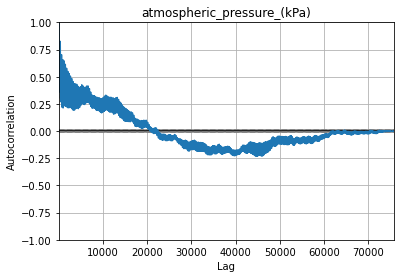

In [28]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[0]])
plt.title(weather_columns[0])

Text(0.5, 1.0, 'precipitation_(mm)')

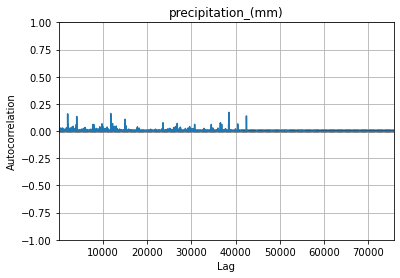

In [29]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[1]])
plt.title(weather_columns[1])

Text(0.5, 1.0, 'radiation_(W/m2)')

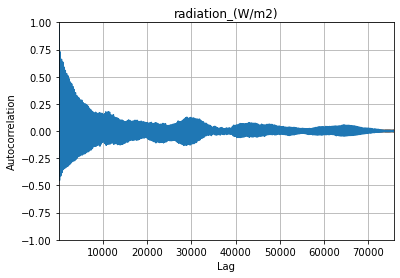

In [30]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[2]])
plt.title(weather_columns[2])

Text(0.5, 1.0, 'relative_humidity_(-)')

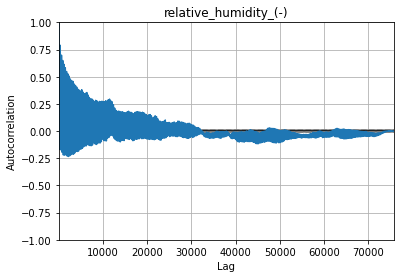

In [31]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[3]])
plt.title(weather_columns[3])

Text(0.5, 1.0, 'temperature_(degrees_Celsius)')

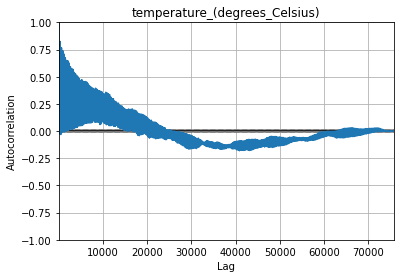

In [32]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[4]])
plt.title(weather_columns[4])

Text(0.5, 1.0, 'wind_direction_(degrees)')

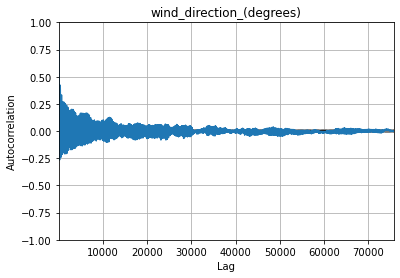

In [33]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[5]])
plt.title(weather_columns[5])

Text(0.5, 1.0, 'wind_gusts_(m/s)')

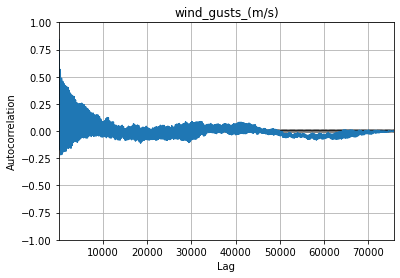

In [34]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[6]])
plt.title(weather_columns[6])

Text(0.5, 1.0, 'wind_speed_(m/s)')

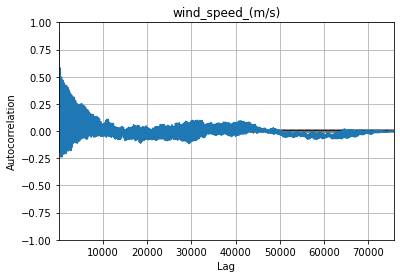

In [35]:
plt.figure()
autocorrelation_plot(weather_df[weather_columns[7]])
plt.title(weather_columns[7])

From the plots, we can tell that there are no trend or seasons in the data for the given time period. 

Conclusion:
- More data might be needed to determine if there are trends or season with the given factors.
- I could also be that the factors occur at random and it would be impossible to predict them.